In [2]:
import os
from PIL import Image
import PIL.ImageOps as ImOps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
path = "/Users/dayatura/Documents/Semester 7/Skripsi/Pak Setiawan/data/all"
images = [x for x in os.listdir(path) if x.endswith(".png")]

In [4]:
def make_square(im, min_size=0, fill_color=(246, 234, 152, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, ((size - x) / 2, (size - y) / 2))
    return new_im

In [5]:
count = 0
X = []
y = []

for image in images:
    
    filename = "../data/all/" + image
    label = image.split("_")[0]
    
    img = Image.open(filename)
#     old_size = img.size
    
    size = (32, 32)
#     new_im = Image.new("RGB", new_size) 
#     new_im.paste(img, ((new_size[0]-old_size[0])/2,
#                           (new_size[1]-old_size[1])/2))
    img = make_square(img)
    img = img.resize(size, Image.ANTIALIAS)
    matrix = np.array(img)
    
    X.append(matrix)
    y.append(label)
    
data = np.array(X)
label = np.array(y)

lb_make = LabelEncoder()
label_code = lb_make.fit_transform(label)
    
np.savez('samadiYellow.npz', data=data, label=label, label_code=label_code)
#     print filename + label
#     count+=1
#     if(count==10):
#         break

In [6]:
%matplotlib inline

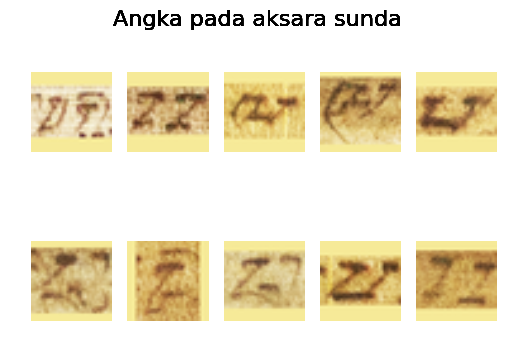

In [7]:
for i in range(10):
    plt.subplot(250+i)
    plt.imshow(X[i+(13*80)], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.suptitle("Angka pada aksara sunda", size=16)
plt.show()

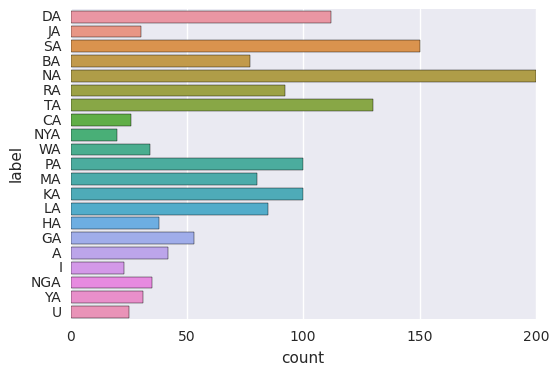

In [61]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

dataset = np.load('samadiYellow.npz')

df = pd.DataFrame({'label':dataset['label'],'label_code':dataset['label_code']})

sns.set(style="darkgrid")
ax = sns.countplot(y=("label"), data=df)

In [62]:
## select 50 first data
akumulasi = df.groupby('label').count()

jumlah = akumulasi.values
huruf = akumulasi.axes[0]

labelBesar = []
for i in range(len(huruf)):
    if jumlah[i] >= 90:
        labelBesar.append(huruf[i])
    
print labelBesar

['DA', 'KA', 'NA', 'PA', 'RA', 'SA', 'TA']


In [63]:
data = np.array(dataset['data'])
label = np.array(dataset['label'])
label_code = np.array(dataset['label_code'])
print data.shape
print label.shape
print label_code.shape

dataF = []
labelF = []
label_codeF = []
# print data[1]
for i in labelBesar:
    dfc = df[df.label==i]
    dataB = dfc.head(100)
#     dataB = dfc
    index = list(dataB.index.values)
#     print index
    for idx in index:
        dataF.append(data[idx])
        labelF.append(label[idx])
        label_codeF.append(label_code[idx])
        
dataBal = np.array(dataF)
labelBal = np.array(labelF)
label_codeBal = np.array(label_codeF)

np.savez('bsamadiYAman.npz', data=dataBal, label=labelBal, label_code=label_codeBal)

print dataBal.shape
print labelBal.shape

(1483, 32, 32, 3)
(1483,)
(1483,)
(692, 32, 32, 3)
(692,)


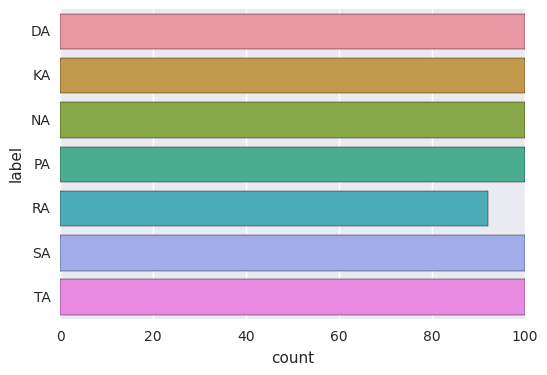

In [64]:
import seaborn as sns
import pandas as pd

dataset = np.load('bsamadiYAman.npz')

df = pd.DataFrame({'label':dataset['label'],'label_code':dataset['label_code']})

sns.set(style="darkgrid")
ax = sns.countplot(y=("label"), data=df)

In [80]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#load data
dataset = numpy.load('bsamadiYAman.npz')
X = dataset['data']
y = dataset['label_code']

#reshape to be [samples][width][height][chanels]

# X = X.reshape(X.shape[0], 28, 28, 1).astype('float32')

# X = X[0:100]
# y = y[0:100]

#normalize the data
X = X[:,:,:,0].reshape(X.shape[0],X.shape[1],X.shape[2], 1).astype('float32')
X = X / 255.0

# one hot encode output
y = np_utils.to_categorical(y)
num_classes = y.shape[1]

def baseline_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Convolution2D(32, (8, 8), input_shape=(X[1].shape), activation= 'relu' ))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.4))
	model.add(Convolution2D(50, (5, 5), activation= 'relu' ))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(150, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

baseline_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          40050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
__________

In [81]:
#### multiple optimizer
# optimizer = ['adam','rmsprop','sgd','adagrad','adadelta','adamax','nadam']
optimizer = ['adam']
model_acc = []
model_loss = []
for op in optimizer:
	model = baseline_model(op)
	history = model.fit(X, y, validation_split=0.33, nb_epoch=10, batch_size=1, verbose=1)
	model_acc.append(history.history['acc'])
	model_loss.append(history.history['loss'])

numpy.savez('resBal.npz', model_acc=model_acc, model_loss=model_loss, optimizer=optimizer)

Train on 463 samples, validate on 229 samples
Epoch 1/10
463/463 [==============================] - 5s - loss: 1.7692 - acc: 0.1771 - val_loss: 6.2978 - val_acc: 0.0000e+00
Epoch 2/10
463/463 [==============================] - 3s - loss: 1.6320 - acc: 0.2333 - val_loss: 5.7269 - val_acc: 0.0000e+00
Epoch 3/10
463/463 [==============================] - 3s - loss: 1.1537 - acc: 0.5140 - val_loss: 10.5501 - val_acc: 0.0000e+00
Epoch 4/10
463/463 [==============================] - 3s - loss: 0.6785 - acc: 0.7495 - val_loss: 11.0929 - val_acc: 0.0437
Epoch 5/10
463/463 [==============================] - 3s - loss: 0.4942 - acc: 0.8143 - val_loss: 12.5550 - val_acc: 0.0830
Epoch 6/10
463/463 [==============================] - 3s - loss: 0.4176 - acc: 0.8618 - val_loss: 12.1811 - val_acc: 0.1092
Epoch 7/10
463/463 [==============================] - 3s - loss: 0.3499 - acc: 0.8618 - val_loss: 11.7415 - val_acc: 0.1004
Epoch 8/10
463/463 [==============================] - 3s - loss: 0.3072 - ac

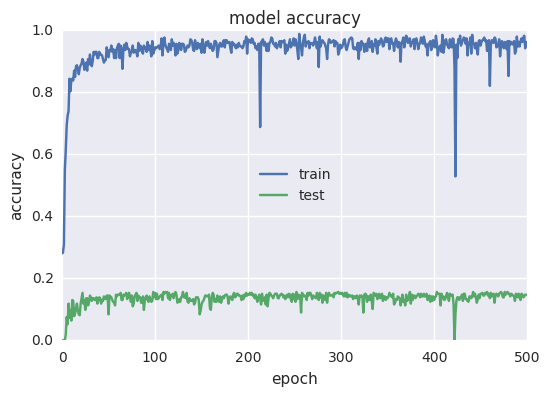

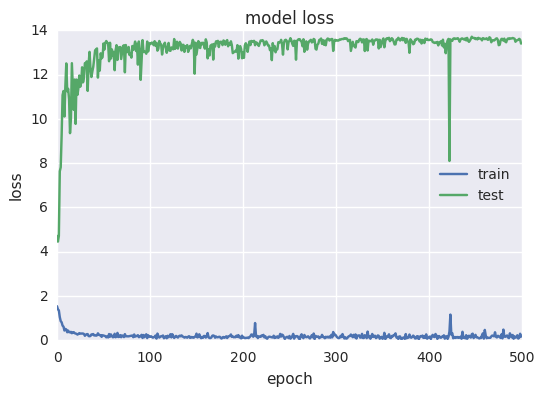

In [84]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

data = numpy.load('sresYAman.npz')
# data = numpy.load('resBal.npz')
model_acc = data['model_acc']
model_acc_val = data['val_acc']
model_loss = data['model_loss']
model_loss_val = data['val_loss']
optimizer = data['optimizer']
optimize = ['train','test']

plt.figure(1)
for op in range(len(optimizer)):
	plt.plot(model_acc[op])
	plt.plot(model_acc_val[op])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend(optimize, loc= 'best' )

plt.figure(2)
for op in range(len(optimizer)):
	plt.plot(model_loss[op])
	plt.plot(model_loss_val[op])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend(optimize, loc= 'best' )
plt.show()

In [93]:
import glob
import numpy as np


files = glob.glob('*.json')
data = []

for file in files:
	detail  = file.split('_')
	detail[2] = detail[2].split('.')[0]
	data.append(detail)

print(data)
time = np.array(data)

[['model', 'adam', '1315'], ['model', 'adam', '2123']]


In [94]:
print "Akurasi training: %f |Loss Training: %f" % (model_acc.max(),model_loss.min())
print "Akurasi validasi: %f |Loss validasi: %f" % (model_acc_val.max(),model_loss_val.min())

Akurasi training: 0.988439 |Loss Training: 0.044232
Akurasi validasi: 0.156069 |Loss validasi: 4.458225
